# Otter Image Demo (In-context Learning)

Here is an example of multi-modal ICL (in-context learning) with 🦦 Otter. We provide two demo images with corresponding instructions and answers, then we ask the model to generate an answer given our instruct. You may change your instruction and see how the model responds.

You can also try our [online demo](https://otter.cliangyu.com/) to see more in-context learning demonstrations.

必要なモジュールは各自インストール<br>
mlflow==2.6.0はバグがあるため使わないこと(https://github.com/mlflow/mlflow/issues/9331) (2023.08.23)

## 読み込み

In [2]:
# model = OtterForConditionalGeneration.from_pretrained("luodian/OTTER-Image-MPT7B", device_map="auto") # Hugging Face
model = OtterForConditionalGeneration.from_pretrained("/home/dataset/otter/OTTER-Image-MPT7B/", device_map="auto")
tokenizer = model.text_tokenizer
image_processor = transformers.CLIPImageProcessor()

Using pad_token, but it is not set yet.


You are using config.init_device='cpu', but you can also use config.init_device="meta" with Composer + FSDP for fast initialization.
The current model version is configured for Otter-Image with max_num_frames set to None.
Total Trainable param: 1.385404 B


The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.
Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

### トークンの確認

In [25]:
# 特殊トークン
model.text_tokenizer.all_special_tokens

['<|endoftext|>', '<PAD>', '<|endofchunk|>', '<image>', '<answer>']

In [27]:
lst = [0, 50277, 50278, 50279, 50280]

for i in lst:
    print(f"{i}: {tokenizer.decode(i)}")
    

0: <|endoftext|>
50277: <|endofchunk|>
50278: <image>
50279: <answer>
50280: <PAD>


In [4]:
model.text_tokenizer.get_vocab

<bound method PreTrainedTokenizerFast.get_vocab of GPTNeoXTokenizerFast(name_or_path='mosaicml/mpt-7b-instruct', vocab_size=50254, model_max_length=2048, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>', 'pad_token': '<PAD>', 'additional_special_tokens': ['<|endofchunk|>', '<image>', '<answer>']}, clean_up_tokenization_spaces=True)>

In [5]:
attributes_and_methods = dir(model.text_tokenizer)
print(attributes_and_methods)

['SPECIAL_TOKENS_ATTRIBUTES', '__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_tokens', '_additional_special_tokens', '_auto_class', '_batch_encode_plus', '_bos_token', '_build_conversation_input_ids', '_call_one', '_cls_token', '_convert_encoding', '_convert_id_to_token', '_convert_token_to_id_with_added_voc', '_create_repo', '_decode', '_decode_use_source_tokenizer', '_encode_plus', '_eos_token', '_eventual_warn_about_too_long_sequence', '_eventually_correct_t5_max_length', '_from_pretrained', '_get_files_timestamps', '_get_padding_truncation_strategies', '_in_target_context_manager', '_mask_token', '_pad', '_pad_token', '_pad_token_type_id', '_pr

In [28]:
tokenizer.decode(11336)

'None'

In [3]:
print(tokenizer.eos_token_id)
print(tokenizer.bos_token_id)

0
0


In [23]:
# instruction_following.pyのtrain_one_epochのlabels
sakai = [ 0, 50278,  6989,    27,  5371,   403,   253, 12834,  1246,   275,
          436,  2460,    32,   604,   627,   403,  5293,    13,  4496,  1333,
          5293,    15,   443,  5736,    27, 50279, 11336, 50277,     0, 50280,
          50280, 50280, 50280
        ]
# modeling_mpt.pyのclass MPTForCausalLM(MPTPreTrainedModel):のforward
# lossに入るGTの可視化
sakai = [-100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         2302,    15,   831, 23069,  1057,   417,   452,   667, 12834,   824,
          347, 31806, 23069,    13, 28290, 23069,    13,   439,  6321,  3612,
        23069,    13, 13968, 23069,    13,   285, 15070, 23069,    13,   594,
          352,   310,  1327,    14,   615,   738,   422,    15, 50277,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  4374,
           15,   831, 23069,   556,   690, 31806, 23069,    13,   594,   352,
          310, 22327,    15, 50277,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  2302,    15,   831, 23069,  1057,   417,
          452,   667, 12834,   824,   347, 31806, 23069,    13, 28290, 23069,
           13,   439,  6321,  3612, 23069,    13, 13968, 23069,    13,   285,
        15070, 23069,    13,   594,   352,   310,  1327,    14,   615,   738,
          422,    15, 50277,     0,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100]
# lossに入るモデルの出力の可視化
sakai = [50343,  6989,    27,   769,   694,   247,  2460,   273,   247,    15,
         4496,   352,  3761,   452,   247,  3102,   390,   347, 11385,  2739,
          390, 11385, 23069,    13,   390,   357,  3612, 23069,    13,   390,
        23069,    13,   390, 15070, 23069,    32,  4496,  5736,    27,  1621,
         1621,    13, 50277,   310,  1057,   417,   452,   667,   273,    15,
          347, 31806, 23069,    13, 28290, 23069,    13,   439,  6321,  3612,
        23069,    13, 13968, 23069,    13,   390, 15070, 23069,    15,   285,
          352,   310,   275,    14,   615,   738,   422,    15, 50277,     0,
         6989,    27,   752,   310,   271,  2460,   273,   247,    15,  1057,
          436, 23069,   452,   667, 12834,   824,   347, 31806, 23069,    13,
        28290, 23069,    13,   439,  6321,  3612, 23069,    13, 13968, 23069,
           13,   285, 15070, 23069,    32,   443,  5736,    27,  1621,  1621,
           13,   380, 23069,   556,   247, 12834, 12834, 12834, 28290,   352,
          310,   417,    15, 50277,     0,  6989,    27,   752,   310,   271,
         2460,   273,   247,    15,   752,   436, 23069,   452,   667, 12834,
          824,   347, 31806, 23069,    13, 28290, 23069,    13,   439,  6321,
         3612, 23069,    13, 13968, 23069,    13,   285, 15070, 23069,    32,
          443,  5736,    27,  6279,  6279,    13,   831, 23069,  1057,   417,
          452,   667, 12834,   824,   347, 31806, 23069,    13, 28290, 23069,
           13,   439,  6321,  3612, 23069,    13, 13968, 23069,    13,   285,
        15070, 23069,    13,   594,   352,   310,  1327,    14,   615,   738,
          422,    15, 50277,     0, 50396, 50280, 50280, 50280, 50280, 50280,
        50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280,
        50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280,
        50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280,
        50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280, 50280]
sakai = [50280 if x == -100 else x for x in sakai]
print(sakai)
for s in sakai:
    print(tokenizer.decode(s),end='')
print()

[0, 50278, 6989, 27, 5371, 403, 253, 12834, 1246, 275, 436, 2460, 32, 604, 627, 403, 5293, 13, 4496, 1333, 5293, 15, 443, 5736, 27, 50279, 11336, 50277, 0, 50280, 50280, 50280, 50280]
<|endoftext|><image>User:what are the defects present in this image? if there are none, please say none. GPT:<answer>None<|endofchunk|><|endoftext|><PAD><PAD><PAD><PAD>


## 推論

torch.Size([1, 3, 1, 3, 224, 224])


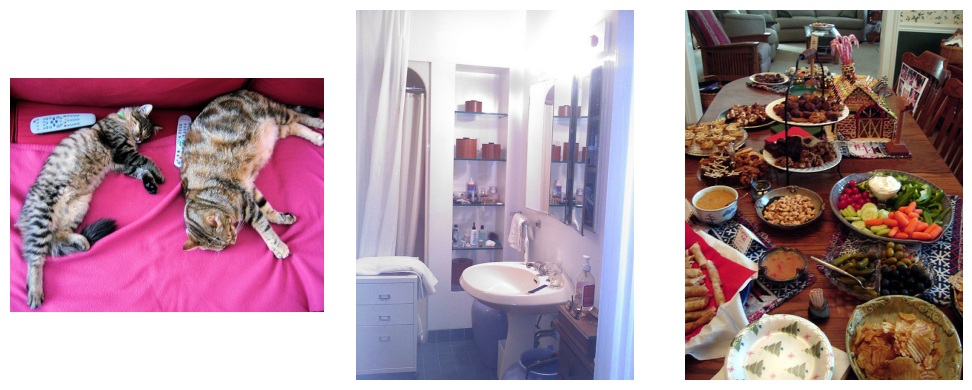

Setting `pad_token_id` to `eos_token_id`:50277 for open-end generation.


Generated text:  A table full of food.


In [6]:
demo_image_one = Image.open(requests.get("http://images.cocodataset.org/val2017/000000039769.jpg", stream=True).raw)
demo_image_two = Image.open(requests.get("http://images.cocodataset.org/test-stuff2017/000000028137.jpg", stream=True).raw)
query_image = Image.open(requests.get("http://images.cocodataset.org/test-stuff2017/000000028352.jpg", stream=True).raw)

vision_x = image_processor.preprocess([demo_image_one, demo_image_two, query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
model.text_tokenizer.padding_side = "left"
lang_x = model.text_tokenizer(
    [
        "<image>User: a photo of GPT:<answer> two cats sleeping.<|endofchunk|><image>User: a photo of GPT:<answer> a bathroom sink.<|endofchunk|><image>User: a photo of GPT:<answer>"
    ],
    return_tensors="pt",
)

print(vision_x.shape) # torch.Size([1, 3, 1, 3, 224, 224]) shape (B, num_imgs, Frames=1, C, H, W)

fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(demo_image_one)
axes[0].axis('off')
axes[1].imshow(demo_image_two)
axes[1].axis('off')
axes[2].imshow(query_image)
axes[2].axis('off')
plt.tight_layout()
plt.show()

# Get the data type from model's parameters
model_dtype = next(model.parameters()).dtype

# Convert tensors to the model's data type
vision_x = vision_x.to(dtype=model_dtype)
lang_x_input_ids = lang_x["input_ids"]
lang_x_attention_mask = lang_x["attention_mask"]

bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
generated_text = model.generate(
    vision_x=vision_x.to(model.device),
    lang_x=lang_x_input_ids.to(model.device),
    attention_mask=lang_x_attention_mask.to(model.device),
    max_new_tokens=512,
    num_beams=3,
    no_repeat_ngram_size=3,
    bad_words_ids=bad_words_id,
)

parsed_output = (
    model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
)

print("Generated text: ", parsed_output)

## MIMIC-ITのjsonファイルの確認

In [ ]:
# ○○_instructions.json

import orjson

mimicit_path="../../data/LA/LACR_I2I_instructions.json"
with open(mimicit_path, "rb") as f:
    dataset = orjson.loads(f.read())
    # dataset = orjson.loads(f.read())["data"]
dataset

In [ ]:
# ○○.json

import ijson

images = {}
images_path="../../data/LA/LA.json"
with open(images_path, "rb") as f:
    for key, value in ijson.kvitems(f, "", use_float=True):
        images[key] = value
images

In [ ]:
# エンコードされた文字列から画像可視化

import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# base64エンコードされた文字列データ
str_data1 = images["LA_IMG_000000215677"]
str_data2 = images["LA_IMG_000000429446"]

# バイトデータにデコード
decoded_data1 = base64.b64decode(str_data1)
decoded_data2 = base64.b64decode(str_data2)

# デコードしたバイトデータをImageオブジェクトに変換
image1 = Image.open(BytesIO(decoded_data1))
image2 = Image.open(BytesIO(decoded_data2))

# 2x1のsubplotを作成して、2枚の画像を表示
fig, axarr = plt.subplots(1, 2)

axarr[0].imshow(image1)
axarr[0].axis('off')  # 軸を非表示に

axarr[1].imshow(image2)
axarr[1].axis('off')  # 軸を非表示に

plt.show()


In [ ]:
# ○○_train.json

import orjson

train_config_path="../../data/LA/LACR_I2I_train.json"
with open(train_config_path, "rb") as f:
    cache_train_config = orjson.loads(f.read())
cache_train_config

In [ ]:
cache_train_list = list(cache_train_config.keys())
print(len(cache_train_list))
print(cache_train_list[:10])

In [ ]:
cache_train_config['LACR_I2I_INS_000000296754']

In [ ]:
cache_train_config['LACR_I2I_INS_000000222475']

## 自作データセット確認

In [ ]:
import orjson

mimicit_path="/home/data/MIMIC-IT/VI/train_VI_long_instructions.json"
with open(mimicit_path, "rb") as f:
    dataset = orjson.loads(f.read())
dataset

In [6]:
import ijson

images = {}
images_path="/home/data/MIMIC-IT/VI/train_VI.json"
with open(images_path, "rb") as f:
    for key, value in ijson.kvitems(f, "", use_float=True):
        images[key] = value
# images

In [ ]:
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# base64エンコードされた文字列データ
str_data1 = images["metal+metal+image_55"]
str_data2 = images["metal+metal_rust+image_8"]

# デコードしたバイトデータをImageオブジェクトに変換
image1 = Image.open(BytesIO(base64.urlsafe_b64decode(str_data1))).convert("RGB")
image2 = Image.open(BytesIO(base64.urlsafe_b64decode(str_data2))).convert("RGB")

# 2x1のsubplotを作成して、2枚の画像を表示
fig, axarr = plt.subplots(1, 2)

axarr[0].imshow(image1)
axarr[0].axis('off')  # 軸を非表示に

axarr[1].imshow(image2)
axarr[1].axis('off')  # 軸を非表示に

plt.show()

In [ ]:
import orjson

train_config_path="/home/data/MIMIC-IT/VI/train_VI_pairs25_train.json"
with open(train_config_path, "rb") as f:
    cache_train_config = orjson.loads(f.read())
cache_train_config

In [ ]:
cache_train_list = list(cache_train_config.keys())
print(len(cache_train_list))
print(cache_train_list[:10])

In [ ]:
cache_train_config['book+aged_book+image_2=0']

## 自作データセット重み性能調査(欠陥名当て)

In [3]:
trained_ckpt_path = '../../log/AC/batch128_epoch5_lr-4/final_weights.pt'
# trained_ckpt_path = '../../weights/OTTER-Image-MPT7B/final_weights.pt' # 学習前

train_ckpt = torch.load(trained_ckpt_path, map_location="cpu")
if train_ckpt.get("model_state_dict", None) is not None:
    train_ckpt = train_ckpt["model_state_dict"]
_ = model.load_state_dict(train_ckpt, strict=False)

trainデータで検証

In [4]:
# データ読み込み
import ijson
import orjson

images = {}
images_path="/home/data/MIMIC-IT/AC/AC_train.json"
with open(images_path, "rb") as f:
    for key, value in ijson.kvitems(f, "", use_float=True):
        images[key] = value

train_config_path="/home/data/MIMIC-IT/AC/AC_train_train.json"
with open(train_config_path, "rb") as f:
    cache_train_config = orjson.loads(f.read())

mimicit_path="/home/data/MIMIC-IT/AC/AC_train_instructions.json"
with open(mimicit_path, "rb") as f:
    instructions = orjson.loads(f.read())

In [5]:
# 正解率
from IPython.display import clear_output
import random
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

keys = list(cache_train_config.keys())
random.seed(42)
random.shuffle(keys)
count = 0
NUM = 1000
for i in range(len(keys[:NUM])):
    print(i)
    query = keys[i].split('=')[0]
    str_data3 = images[query]

    # デコードしたバイトデータをImageオブジェクトに変換
    query_image = Image.open(BytesIO(base64.urlsafe_b64decode(str_data3))).convert("RGB")

    vision_x = image_processor.preprocess([query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
    model.text_tokenizer.padding_side = "left"

    inputs = textwrap.dedent(f"""
        <image>User: {instructions["data"][query]["instruction"]} GPT:<answer>
    """)
    inputs = "".join(inputs.split("\n"))
    lang_x = model.text_tokenizer(
        [
            inputs
        ],
        return_tensors="pt",
    )

    # Get the data type from model's parameters
    model_dtype = next(model.parameters()).dtype

    # Convert tensors to the model's data type
    vision_x = vision_x.to(dtype=model_dtype)
    lang_x_input_ids = lang_x["input_ids"]
    lang_x_attention_mask = lang_x["attention_mask"]

    bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
    generated_text = model.generate(
        vision_x=vision_x.to(model.device),
        lang_x=lang_x_input_ids.to(model.device),
        attention_mask=lang_x_attention_mask.to(model.device),
        max_new_tokens=512,
        num_beams=3,
        no_repeat_ngram_size=3,
        bad_words_ids=bad_words_id,
    )

    parsed_output = (
        model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
    )
    
    if instructions["data"][query]["answer"].lower()==parsed_output.lower():
        count += 1
    clear_output(wait=True)
    
print(f"correct: {count}, total: {NUM}, acc: {(count / NUM) * 100:.2f}%")

correct: 994, total: 1000, acc: 99.40%


In [ ]:
# 一部可視化
import random
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO


keys = list(cache_train_config.keys())
random.seed(42)
random.shuffle(keys)
NUM = 10
count = 0
for i in range(len(keys[:NUM])):
    query = keys[i].split('=')[0]

    str_data3 = images[query] # クエリ

    # デコードしたバイトデータをImageオブジェクトに変換
    query_image = Image.open(BytesIO(base64.urlsafe_b64decode(str_data3))).convert("RGB")

    vision_x = image_processor.preprocess([query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
    model.text_tokenizer.padding_side = "left"

    inputs = textwrap.dedent(f"""
        <image>User: {instructions["data"][query]["instruction"]} GPT:<answer>
    """)
    inputs = "".join(inputs.split("\n"))
    lang_x = model.text_tokenizer(
        [
            inputs
        ],
        return_tensors="pt",
    )

    # Get the data type from model's parameters
    model_dtype = next(model.parameters()).dtype

    # Convert tensors to the model's data type
    vision_x = vision_x.to(dtype=model_dtype)
    lang_x_input_ids = lang_x["input_ids"]
    lang_x_attention_mask = lang_x["attention_mask"]

    bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
    generated_text = model.generate(
        vision_x=vision_x.to(model.device),
        lang_x=lang_x_input_ids.to(model.device),
        attention_mask=lang_x_attention_mask.to(model.device),
        max_new_tokens=512,
        num_beams=3,
        no_repeat_ngram_size=3,
        bad_words_ids=bad_words_id,
    )

    parsed_output = (
        model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
    )
    
    if instructions["data"][query]["answer"].lower()==parsed_output.lower():
        count += 1
        
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
    axes.imshow(query_image)
    axes.axis('off')
    print("--------------------------------------------------------")
    print(query)
    print(inputs)
    print("GPT:", parsed_output)
    plt.show()

print(f"correct: {count}, total: {NUM}, acc: {(count / NUM) * 100:.2f}%")

valデータで検証

In [6]:
# データ読み込み
import ijson
import orjson

images = {}
images_path="/home/data/MIMIC-IT/AC/AC_val.json"
with open(images_path, "rb") as f:
    for key, value in ijson.kvitems(f, "", use_float=True):
        images[key] = value

train_config_path="/home/data/MIMIC-IT/AC/AC_val_train.json"
with open(train_config_path, "rb") as f:
    cache_train_config = orjson.loads(f.read())

mimicit_path="/home/data/MIMIC-IT/AC/AC_val_instructions.json"
with open(mimicit_path, "rb") as f:
    instructions = orjson.loads(f.read())

In [7]:
# 正解率
from IPython.display import clear_output
import random
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

keys = list(cache_train_config.keys())
random.seed(42)
random.shuffle(keys)
count = 0
NUM = 1000
for i in range(len(keys[:NUM])):
    print(i)
    query = keys[i].split('=')[0]
    str_data3 = images[query]

    # デコードしたバイトデータをImageオブジェクトに変換
    query_image = Image.open(BytesIO(base64.urlsafe_b64decode(str_data3))).convert("RGB")

    vision_x = image_processor.preprocess([query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
    model.text_tokenizer.padding_side = "left"

    inputs = textwrap.dedent(f"""
        <image>User: {instructions["data"][query]["instruction"]} GPT:<answer>
    """)
    inputs = "".join(inputs.split("\n"))
    lang_x = model.text_tokenizer(
        [
            inputs
        ],
        return_tensors="pt",
    )

    # Get the data type from model's parameters
    model_dtype = next(model.parameters()).dtype

    # Convert tensors to the model's data type
    vision_x = vision_x.to(dtype=model_dtype)
    lang_x_input_ids = lang_x["input_ids"]
    lang_x_attention_mask = lang_x["attention_mask"]

    bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
    generated_text = model.generate(
        vision_x=vision_x.to(model.device),
        lang_x=lang_x_input_ids.to(model.device),
        attention_mask=lang_x_attention_mask.to(model.device),
        max_new_tokens=512,
        num_beams=3,
        no_repeat_ngram_size=3,
        bad_words_ids=bad_words_id,
    )

    parsed_output = (
        model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
    )
    
    if instructions["data"][query]["answer"].lower()==parsed_output.lower():
        count += 1
    clear_output(wait=True)

print(f"correct: {count}, total: {NUM}, acc: {(count / NUM) * 100:.2f}%")

correct: 827, total: 1000, acc: 82.70%


In [ ]:
# 一部可視化
import random
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO


keys = list(cache_train_config.keys())
random.seed(42)
random.shuffle(keys)
NUM = 10
count = 0
for i in range(len(keys[:NUM])):
    query = keys[i].split('=')[0]

    str_data3 = images[query] # クエリ

    # デコードしたバイトデータをImageオブジェクトに変換
    query_image = Image.open(BytesIO(base64.urlsafe_b64decode(str_data3))).convert("RGB")

    vision_x = image_processor.preprocess([query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
    model.text_tokenizer.padding_side = "left"

    inputs = textwrap.dedent(f"""
        <image>User: {instructions["data"][query]["instruction"]} GPT:<answer>
    """)
    inputs = "".join(inputs.split("\n"))
    lang_x = model.text_tokenizer(
        [
            inputs
        ],
        return_tensors="pt",
    )

    # Get the data type from model's parameters
    model_dtype = next(model.parameters()).dtype

    # Convert tensors to the model's data type
    vision_x = vision_x.to(dtype=model_dtype)
    lang_x_input_ids = lang_x["input_ids"]
    lang_x_attention_mask = lang_x["attention_mask"]

    bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
    generated_text = model.generate(
        vision_x=vision_x.to(model.device),
        lang_x=lang_x_input_ids.to(model.device),
        attention_mask=lang_x_attention_mask.to(model.device),
        max_new_tokens=512,
        num_beams=3,
        no_repeat_ngram_size=3,
        bad_words_ids=bad_words_id,
    )

    parsed_output = (
        model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
    )
    
    if instructions["data"][query]["answer"].lower()==parsed_output.lower():
        count += 1
        
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
    axes.imshow(query_image)
    axes.axis('off')
    print("--------------------------------------------------------")
    print(query)
    print(inputs)
    print("GPT:", parsed_output)
    plt.show()

print(f"correct: {count}, total: {NUM}, acc: {(count / NUM) * 100:.2f}%")

### MVTecAD(欠陥名当て)

In [3]:
model_name = "AC/batch128_epoch5_lr-4"
trained_ckpt_path = f'../../log/{model_name}/final_weights.pt'

train_ckpt = torch.load(trained_ckpt_path, map_location="cpu")
if train_ckpt.get("model_state_dict", None) is not None:
    train_ckpt = train_ckpt["model_state_dict"]
_ = model.load_state_dict(train_ckpt, strict=False)

In [4]:
import os
def get_image_paths(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png']  # 画像の拡張子リスト
    all_files = sorted(os.listdir(folder_path)) # フォルダ内の全てのファイルを取得
    image_paths = [os.path.join(folder_path, file) for file in all_files if os.path.splitext(file)[1].lower() in image_extensions] # 画像のパスを抽出してリストに格納
    return image_paths

def write_text_file(file_path, text):
    with open(file_path, mode="a") as f:
        f.write(text+"\n")
        
def generate_list_string(items):
    # アンダースコアをスペースに変換
    items = [item.replace('_', ' ') for item in items]
    if len(items) == 1:
        return items[0]
    elif len(items) == 2:
        return f"{items[0]} and {items[1]}"
    else:
        return ", ".join(items[:-1]) + f", and {items[-1]}"

In [7]:
# クエリのみ使用
from IPython.display import clear_output

def test(folder, sub_folder, GTs, model_name):
    acc = []
    for j, (sub,gt) in enumerate(zip(sub_folder,GTs)):
        folder_name = f'./result/{folder}/{sub}/{model_name}'
        os.makedirs(folder_name, exist_ok=True)
        with open(f'{folder_name}/AC.txt', mode='w') as f:
            f.close()
        
        model.text_tokenizer.padding_side = "left"
        
        sentence = f"{sub} --> {gt}"
        # print(sentence)
        write_text_file(f'{folder_name}/AC.txt',sentence)
        inputs = textwrap.dedent(f"""
           <image>User: What are the defects present in this image? If there are none, please say None. GPT:<answer>
        """)    
        
        inputs = "".join(inputs.split("\n"))
        lang_x = model.text_tokenizer(
            [
                inputs
            ],
            return_tensors="pt",
        )
        
        write_text_file(f'{folder_name}/AC.txt',f'-----{sub} start-----')
        write_text_file(f'{folder_name}/AC.txt',"")
            
        query_folder_path = f"/home/data/mvtec/{folder}/test/{sub}"
        query_image_paths = get_image_paths(query_folder_path)
        count = 0
        for i, query_image_path in enumerate(query_image_paths[:]):
            # print(query_image_path)
            query_image = Image.open(query_image_path).resize((224, 224)).convert("RGB")
            vision_x = image_processor.preprocess([query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
        
            # Get the data type from model's parameters
            model_dtype = next(model.parameters()).dtype

            # Convert tensors to the model's data type
            vision_x = vision_x.to(dtype=model_dtype)
            lang_x_input_ids = lang_x["input_ids"]
            lang_x_attention_mask = lang_x["attention_mask"]

            bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
            generated_text = model.generate(
                vision_x=vision_x.to(model.device),
                lang_x=lang_x_input_ids.to(model.device),
                attention_mask=lang_x_attention_mask.to(model.device),
                max_new_tokens=512,
                num_beams=3,
                no_repeat_ngram_size=3,
                bad_words_ids=bad_words_id,
            )

            parsed_output = (
                model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
            )
            
            if parsed_output.lower()==gt.lower():
                count += 1
            
            write_text_file(f'{folder_name}/AC.txt',query_image_path)
            write_text_file(f'{folder_name}/AC.txt',parsed_output)
            write_text_file(f'{folder_name}/AC.txt',"")
            clear_output(wait=True)
            
            # print(inputs)
            # print("GPT:", parsed_output)
            
            # fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
            # axes.imshow(query_image)
            # axes.axis('off')
            # plt.show()
            
        accuracy = f"correct: {count}, total: {len(query_image_paths)}, acc: {(count / (len(query_image_paths))) * 100:.2f}%"
        acc.append((sub,accuracy))
        
        write_text_file(f'{folder_name}/AC.txt',f'-----{sub} end-----')
        write_text_file(f'{folder_name}/AC.txt',accuracy)

    for a in acc:
        print(a)
        

In [8]:
folder = "bottle"
sub_folder = ["good","broken_large","broken_small","contamination"]
GTs = ['None','broken','broken','contamination']

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 10, total: 20, acc: 50.00%')
('broken_large', 'correct: 0, total: 20, acc: 0.00%')
('broken_small', 'correct: 0, total: 22, acc: 0.00%')
('contamination', 'correct: 0, total: 21, acc: 0.00%')


In [9]:
folder = "cable"
sub_folder = ["good","bent_wire","cable_swap","cut_inner_insulation","cut_outer_insulation","missing_cable","missing_wire","poke_insulation"]
GTs = ["None",'bent','swapp','crack','crack','missing','missing','hole']

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 17, total: 58, acc: 29.31%')
('bent_wire', 'correct: 0, total: 13, acc: 0.00%')
('cable_swap', 'correct: 0, total: 12, acc: 0.00%')
('cut_inner_insulation', 'correct: 0, total: 14, acc: 0.00%')
('cut_outer_insulation', 'correct: 0, total: 10, acc: 0.00%')
('missing_cable', 'correct: 0, total: 12, acc: 0.00%')
('missing_wire', 'correct: 0, total: 10, acc: 0.00%')
('poke_insulation', 'correct: 0, total: 10, acc: 0.00%')


In [10]:
folder = "capsule"
sub_folder = ["good","crack","faulty_imprint","poke","scratch","squeeze"]
GTs = ["None",'crack','misprint','hole','scratch','misshapen']

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 23, total: 23, acc: 100.00%')
('crack', 'correct: 1, total: 23, acc: 4.35%')
('faulty_imprint', 'correct: 0, total: 22, acc: 0.00%')
('poke', 'correct: 0, total: 21, acc: 0.00%')
('scratch', 'correct: 4, total: 23, acc: 17.39%')
('squeeze', 'correct: 0, total: 20, acc: 0.00%')


In [11]:
folder = "carpet"
sub_folder = ["good","color","cut","hole","metal_contamination","thread"]
GTs = ["None",'stain','cut','hole','contamination','contamination']

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 28, total: 28, acc: 100.00%')
('color', 'correct: 0, total: 19, acc: 0.00%')
('cut', 'correct: 0, total: 17, acc: 0.00%')
('hole', 'correct: 2, total: 17, acc: 11.76%')
('metal_contamination', 'correct: 0, total: 17, acc: 0.00%')
('thread', 'correct: 0, total: 19, acc: 0.00%')


In [12]:
folder = "grid"
sub_folder = ["good","bent","broken","glue","metal_contamination","thread"]
GTs = ["None","bent","broken","contamination","contamination","contamination"]

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 21, total: 21, acc: 100.00%')
('bent', 'correct: 0, total: 12, acc: 0.00%')
('broken', 'correct: 0, total: 12, acc: 0.00%')
('glue', 'correct: 0, total: 11, acc: 0.00%')
('metal_contamination', 'correct: 0, total: 11, acc: 0.00%')
('thread', 'correct: 0, total: 11, acc: 0.00%')


In [13]:
folder = "hazelnut"
sub_folder = ["good","crack","cut","hole","print"]
GTs = ['None','crack','scratch','hole','misprint']

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 1, total: 40, acc: 2.50%')
('crack', 'correct: 3, total: 18, acc: 16.67%')
('cut', 'correct: 1, total: 17, acc: 5.88%')
('hole', 'correct: 7, total: 18, acc: 38.89%')
('print', 'correct: 0, total: 17, acc: 0.00%')


In [14]:
folder = "leather"
sub_folder = ["good","color","cut","fold","glue","poke"]
GTs = ['None','stain','scratch','wrinkle','stain','hole']

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 32, total: 32, acc: 100.00%')
('color', 'correct: 9, total: 19, acc: 47.37%')
('cut', 'correct: 3, total: 19, acc: 15.79%')
('fold', 'correct: 0, total: 17, acc: 0.00%')
('glue', 'correct: 0, total: 19, acc: 0.00%')


In [17]:
folder = "metal_nut"
sub_folder = ["good","bent","color","flip","scratch"]
GTs = ['None','bent','stain','flip','scratch']

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 0, total: 22, acc: 0.00%')
('bent', 'correct: 0, total: 25, acc: 0.00%')
('color', 'correct: 0, total: 22, acc: 0.00%')
('flip', 'correct: 0, total: 23, acc: 0.00%')
('scratch', 'correct: 0, total: 23, acc: 0.00%')


In [18]:
folder = "pill"
sub_folder = ["good","color","contamination","crack","faulty_imprint","scratch","pill_type"]
GTs = ['None','stain','contamination','crack','misprint','scratch','stain']

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 21, total: 26, acc: 80.77%')
('color', 'correct: 0, total: 25, acc: 0.00%')
('contamination', 'correct: 0, total: 21, acc: 0.00%')
('crack', 'correct: 0, total: 26, acc: 0.00%')
('faulty_imprint', 'correct: 0, total: 19, acc: 0.00%')
('scratch', 'correct: 2, total: 24, acc: 8.33%')
('pill_type', 'correct: 0, total: 9, acc: 0.00%')


In [19]:
folder = "screw"
sub_folder = ["good","manipulated_front","scratch_head","scratch_neck","thread_side","thread_top"]
GTs = ['None','strip','chip','chip','chip','chip']

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 21, total: 41, acc: 51.22%')
('manipulated_front', 'correct: 0, total: 24, acc: 0.00%')
('scratch_head', 'correct: 0, total: 24, acc: 0.00%')
('scratch_neck', 'correct: 0, total: 25, acc: 0.00%')
('thread_side', 'correct: 0, total: 23, acc: 0.00%')
('thread_top', 'correct: 0, total: 23, acc: 0.00%')


In [20]:
folder = "tile"
sub_folder = ["good","crack","glue_strip","gray_stroke","oil","rough"]
GTs = ['None','crack','contamination','stain','stain','contamination']

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 0, total: 33, acc: 0.00%')
('crack', 'correct: 15, total: 17, acc: 88.24%')
('glue_strip', 'correct: 0, total: 18, acc: 0.00%')
('gray_stroke', 'correct: 0, total: 16, acc: 0.00%')
('oil', 'correct: 0, total: 18, acc: 0.00%')
('rough', 'correct: 0, total: 15, acc: 0.00%')


In [21]:
folder = "toothbrush"
sub_folder = ["good","defective"]
GTs = ["None","broken"]

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 5, total: 12, acc: 41.67%')
('defective', 'correct: 0, total: 30, acc: 0.00%')


In [22]:
folder = "transistor"
sub_folder = ["good","bent_lead","cut_lead","damaged_case","misplaced"]
GTs = ["None","bent","cut","broken","misalignment"]

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 59, total: 60, acc: 98.33%')
('bent_lead', 'correct: 0, total: 10, acc: 0.00%')
('cut_lead', 'correct: 0, total: 10, acc: 0.00%')
('damaged_case', 'correct: 3, total: 10, acc: 30.00%')
('misplaced', 'correct: 0, total: 10, acc: 0.00%')


In [23]:
folder = "wood"
sub_folder = ["good","color","scratch","liquid","hole"]
GTs = ["None","stain","scratch","stain","hole"]

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 18, total: 19, acc: 94.74%')
('color', 'correct: 2, total: 8, acc: 25.00%')
('scratch', 'correct: 15, total: 21, acc: 71.43%')
('liquid', 'correct: 0, total: 10, acc: 0.00%')
('hole', 'correct: 1, total: 10, acc: 10.00%')


In [24]:
folder = "zipper"
sub_folder = ["good","broken_teeth","fabric_border","fabric_interior","rough","split_teeth","squeezed_teeth"]
GTs = ["None","broken","tear","frayed","frayed","misshapen","misshapen"]

test(folder, sub_folder, GTs, model_name)

('good', 'correct: 32, total: 32, acc: 100.00%')
('broken_teeth', 'correct: 0, total: 19, acc: 0.00%')
('fabric_border', 'correct: 3, total: 17, acc: 17.65%')
('fabric_interior', 'correct: 0, total: 16, acc: 0.00%')
('rough', 'correct: 0, total: 17, acc: 0.00%')
('split_teeth', 'correct: 0, total: 18, acc: 0.00%')
('squeezed_teeth', 'correct: 0, total: 16, acc: 0.00%')


### 非公開データセットで検証

In [ ]:
# category = "rice"
# anormaly_reason = ["brokened rice","rice with milky white"]
# anormaly_type = ["broken","milky_white"]

# test(category, anormaly_reason, anormaly_type, model_name)

## 自作データセット重み性能調査(コンテキスト)

In [ ]:
trained_ckpt_path = '../../log/AC-VI_loss_context_query/batch128_epoch1_lr-4_pairs25_weight4/final_weights.pt'
# trained_ckpt_path = '../../weights/OTTER-Image-MPT7B/final_weights.pt' # 学習前

train_ckpt = torch.load(trained_ckpt_path, map_location="cpu")
if train_ckpt.get("model_state_dict", None) is not None:
    train_ckpt = train_ckpt["model_state_dict"]
_ = model.load_state_dict(train_ckpt, strict=False)

trainデータで検証

In [ ]:
import ijson
import orjson

images = {}
images_path="/home/data/MIMIC-IT/VI_jsons/VI_train.json"
with open(images_path, "rb") as f:
    for key, value in ijson.kvitems(f, "", use_float=True):
        images[key] = value

train_config_path="/home/data/MIMIC-IT/VI_jsons/VI_train_pairs25_train.json"
with open(train_config_path, "rb") as f:
    cache_train_config = orjson.loads(f.read())

mimicit_path="/home/data/MIMIC-IT/VI_jsons/VI_train_instructions.json"
with open(mimicit_path, "rb") as f:
    instructions = orjson.loads(f.read())

In [ ]:
# 正解率
from IPython.display import clear_output
import random
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

keys = list(cache_train_config.keys())
random.seed(42)
random.shuffle(keys)
count = 0
NUM = 1000
for i in range(len(keys[:NUM])):
    print(i)
    query = keys[i].split('=')[0]
    str_data3 = images[query]

    # デコードしたバイトデータをImageオブジェクトに変換
    query_image = Image.open(BytesIO(base64.urlsafe_b64decode(str_data3))).convert("RGB")

    vision_x = image_processor.preprocess([query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
    model.text_tokenizer.padding_side = "left"

    inputs = textwrap.dedent(f"""
        <image>User: {instructions["data"][query]["instruction"]} GPT:<answer>
    """)
    inputs = "".join(inputs.split("\n"))
    lang_x = model.text_tokenizer(
        [
            inputs
        ],
        return_tensors="pt",
    )

    # Get the data type from model's parameters
    model_dtype = next(model.parameters()).dtype

    # Convert tensors to the model's data type
    vision_x = vision_x.to(dtype=model_dtype)
    lang_x_input_ids = lang_x["input_ids"]
    lang_x_attention_mask = lang_x["attention_mask"]

    bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
    generated_text = model.generate(
        vision_x=vision_x.to(model.device),
        lang_x=lang_x_input_ids.to(model.device),
        attention_mask=lang_x_attention_mask.to(model.device),
        max_new_tokens=512,
        num_beams=3,
        no_repeat_ngram_size=3,
        bad_words_ids=bad_words_id,
    )

    parsed_output = (
        model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
    )
    
    if instructions["data"][query]["answer"].lower()==parsed_output.lower():
        count += 1
    clear_output(wait=True)
    
print(f"correct: {count}, total: {NUM}, acc: {(count / NUM) * 100:.2f}%")

In [ ]:
import random
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO


keys = list(cache_train_config.keys())
random.seed(42)
random.shuffle(keys)
NUM = 50
count = 0
for i in range(len(keys[:NUM])):
    context1 = cache_train_config[keys[i]][0]
    context2 = cache_train_config[keys[i]][1]
    query = keys[i].split('=')[0]

    str_data1 = images[context1] # コンテキスト1
    str_data2 = images[context2] # コンテキスト2
    str_data3 = images[query] # クエリ

    # デコードしたバイトデータをImageオブジェクトに変換
    demo_image_one = Image.open(BytesIO(base64.urlsafe_b64decode(str_data1))).convert("RGB")
    demo_image_two = Image.open(BytesIO(base64.urlsafe_b64decode(str_data2))).convert("RGB")
    query_image = Image.open(BytesIO(base64.urlsafe_b64decode(str_data3))).convert("RGB")

    vision_x = image_processor.preprocess([demo_image_one, demo_image_two, query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
    model.text_tokenizer.padding_side = "left"

    inputs = textwrap.dedent(f"""
        <image>User: {instructions["data"][context1]["instruction"]} GPT:<answer> {instructions["data"][context1]["answer"]}<|endofchunk|>
        <image>User: {instructions["data"][context2]["instruction"]} GPT:<answer> {instructions["data"][context2]["answer"]}<|endofchunk|>
        <image>User: {instructions["data"][query]["instruction"]} GPT:<answer>
    """)
    inputs = "".join(inputs.split("\n"))
    lang_x = model.text_tokenizer(
        [
            inputs
        ],
        return_tensors="pt",
    )

    # Get the data type from model's parameters
    model_dtype = next(model.parameters()).dtype

    # Convert tensors to the model's data type
    vision_x = vision_x.to(dtype=model_dtype)
    lang_x_input_ids = lang_x["input_ids"]
    lang_x_attention_mask = lang_x["attention_mask"]

    bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
    generated_text = model.generate(
        vision_x=vision_x.to(model.device),
        lang_x=lang_x_input_ids.to(model.device),
        attention_mask=lang_x_attention_mask.to(model.device),
        max_new_tokens=512,
        num_beams=3,
        no_repeat_ngram_size=3,
        bad_words_ids=bad_words_id,
    )

    parsed_output = (
        model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
    )
    
    if instructions["data"][query]["answer"].split(".")[0].lower()==parsed_output.split(".")[0].lower():
        count += 1
        
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
    axes[0].imshow(demo_image_one)
    axes[0].axis('off')
    axes[1].imshow(demo_image_two)
    axes[1].axis('off')
    axes[2].imshow(query_image)
    axes[2].axis('off')
    print("--------------------------------------------------------")
    print(query)
    print(inputs)
    print("GPT:", parsed_output)
    plt.show()

print(f"correct: {count}, total: {NUM}, acc: {(count / NUM) * 100:.2f}%")

学習に使用していないデータで検証 (カテゴリ、欠陥名は既知)

In [10]:
import ijson
import orjson

images = {}
images_path="/home/data/MIMIC-IT/VI/val_VI.json"
with open(images_path, "rb") as f:
    for key, value in ijson.kvitems(f, "", use_float=True):
        images[key] = value

train_config_path="/home/data/MIMIC-IT/VI/val_VI_pairs25_train.json"
with open(train_config_path, "rb") as f:
    cache_train_config = orjson.loads(f.read())

# mimicit_path="/home/data/MIMIC-IT/VI/val_VI_short_instructions.json"
# mimicit_path="/home/data/MIMIC-IT/VI/val_VI_long_instructions.json"
mimicit_path="/home/data/MIMIC-IT/VI/val_VI_latest_instructions.json"
with open(mimicit_path, "rb") as f:
    instructions = orjson.loads(f.read())

In [ ]:
import random
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO


keys = list(cache_train_config.keys())
random.seed(42)
random.shuffle(keys)
NUM = 50
count = 0
for i in range(len(keys[:NUM])):
    context1 = cache_train_config[keys[i]][0]
    context2 = cache_train_config[keys[i]][1]
    query = keys[i].split('=')[0]

    str_data1 = images[context1] # コンテキスト1
    str_data2 = images[context2] # コンテキスト2
    str_data3 = images[query] # クエリ

    # デコードしたバイトデータをImageオブジェクトに変換
    demo_image_one = Image.open(BytesIO(base64.urlsafe_b64decode(str_data1))).convert("RGB")
    demo_image_two = Image.open(BytesIO(base64.urlsafe_b64decode(str_data2))).convert("RGB")
    query_image = Image.open(BytesIO(base64.urlsafe_b64decode(str_data3))).convert("RGB")

    vision_x = image_processor.preprocess([demo_image_one, demo_image_two, query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
    model.text_tokenizer.padding_side = "left"

    inputs = textwrap.dedent(f"""
        <image>User: {instructions["data"][context1]["instruction"]} GPT:<answer> {instructions["data"][context1]["answer"]}<|endofchunk|>
        <image>User: {instructions["data"][context2]["instruction"]} GPT:<answer> {instructions["data"][context2]["answer"]}<|endofchunk|>
        <image>User: {instructions["data"][query]["instruction"]} GPT:<answer>
    """)
    inputs = "".join(inputs.split("\n"))
    lang_x = model.text_tokenizer(
        [
            inputs
        ],
        return_tensors="pt",
    )

    # Get the data type from model's parameters
    model_dtype = next(model.parameters()).dtype

    # Convert tensors to the model's data type
    vision_x = vision_x.to(dtype=model_dtype)
    lang_x_input_ids = lang_x["input_ids"]
    lang_x_attention_mask = lang_x["attention_mask"]

    bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
    generated_text = model.generate(
        vision_x=vision_x.to(model.device),
        lang_x=lang_x_input_ids.to(model.device),
        attention_mask=lang_x_attention_mask.to(model.device),
        max_new_tokens=512,
        num_beams=3,
        no_repeat_ngram_size=3,
        bad_words_ids=bad_words_id,
    )

    parsed_output = (
        model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
    )
    
    # if instructions["data"][query]["answer"].split(".")[0].lower()==parsed_output.split(".")[0].lower():
    #     count += 1
    if instructions["data"][query]["answer"].split(" ")[0].lower()==parsed_output.split(" ")[0].lower():
        count += 1
        
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
    axes[0].imshow(demo_image_one)
    axes[0].axis('off')
    axes[1].imshow(demo_image_two)
    axes[1].axis('off')
    axes[2].imshow(query_image)
    axes[2].axis('off')
    print("--------------------------------------------------------")
    print(query)
    print(inputs)
    print("GPT:", parsed_output)
    plt.show()

print(f"correct: {count}, total: {NUM}, acc: {(count / NUM) * 100:.2f}%")

学習に使用したデータで検証

In [9]:
import ijson
import orjson

images = {}
images_path="/home/data/MIMIC-IT/VI/VI_train_VI.json"
with open(images_path, "rb") as f:
    for key, value in ijson.kvitems(f, "", use_float=True):
        images[key] = value

train_config_path="/home/data/MIMIC-IT/VI/VI_train_VI_pairs25_train.json"
with open(train_config_path, "rb") as f:
    cache_train_config = orjson.loads(f.read())

# mimicit_path="/home/data/MIMIC-IT/VI/train_VI_short_instructions.json"
mimicit_path="/home/data/MIMIC-IT/VI/VI_train_VI_latest_instructions.json"
with open(mimicit_path, "rb") as f:
    instructions = orjson.loads(f.read())

In [ ]:
import random
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO


keys = list(cache_train_config.keys())
random.seed(42)
random.shuffle(keys)
NUM = 50
count = 0
for i in range(len(keys[:NUM])):
    context1 = cache_train_config[keys[i]][0]
    context2 = cache_train_config[keys[i]][1]
    query = keys[i].split('=')[0]

    str_data1 = images[context1] # コンテキスト1
    str_data2 = images[context2] # コンテキスト2
    str_data3 = images[query] # クエリ

    # デコードしたバイトデータをImageオブジェクトに変換
    demo_image_one = Image.open(BytesIO(base64.urlsafe_b64decode(str_data1))).convert("RGB")
    demo_image_two = Image.open(BytesIO(base64.urlsafe_b64decode(str_data2))).convert("RGB")
    query_image = Image.open(BytesIO(base64.urlsafe_b64decode(str_data3))).convert("RGB")

    vision_x = image_processor.preprocess([demo_image_one, demo_image_two, query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
    model.text_tokenizer.padding_side = "left"

    inputs = textwrap.dedent(f"""
        <image>User: {instructions["data"][context1]["instruction"]} GPT:<answer> {instructions["data"][context1]["answer"]}<|endofchunk|>
        <image>User: {instructions["data"][context2]["instruction"]} GPT:<answer> {instructions["data"][context2]["answer"]}<|endofchunk|>
        <image>User: {instructions["data"][query]["instruction"]} GPT:<answer>
    """)
    inputs = "".join(inputs.split("\n"))
    lang_x = model.text_tokenizer(
        [
            inputs
        ],
        return_tensors="pt",
    )

    # Get the data type from model's parameters
    model_dtype = next(model.parameters()).dtype

    # Convert tensors to the model's data type
    vision_x = vision_x.to(dtype=model_dtype)
    lang_x_input_ids = lang_x["input_ids"]
    lang_x_attention_mask = lang_x["attention_mask"]

    bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
    generated_text = model.generate(
        vision_x=vision_x.to(model.device),
        lang_x=lang_x_input_ids.to(model.device),
        attention_mask=lang_x_attention_mask.to(model.device),
        max_new_tokens=512,
        num_beams=3,
        no_repeat_ngram_size=3,
        bad_words_ids=bad_words_id,
    )

    parsed_output = (
        model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
    )
    
    if instructions["data"][query]["answer"].split(".")[0].lower()==parsed_output.split(".")[0].lower():
        count += 1
        
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
    axes[0].imshow(demo_image_one)
    axes[0].axis('off')
    axes[1].imshow(demo_image_two)
    axes[1].axis('off')
    axes[2].imshow(query_image)
    axes[2].axis('off')
    print("--------------------------------------------------------")
    print(query)
    print(inputs)
    print("GPT:", parsed_output)
    plt.show()

print(f"correct: {count}, total: {NUM}, acc: {(count / NUM) * 100:.2f}%")

学習に使用していないデータで検証 (カテゴリは未知、欠陥名はほぼ既知)

In [12]:
import ijson
import orjson

images = {}
images_path="/home/data/MIMIC-IT/VI/test_VI.json"
with open(images_path, "rb") as f:
    for key, value in ijson.kvitems(f, "", use_float=True):
        images[key] = value

train_config_path="/home/data/MIMIC-IT/VI/test_VI_pairs5_train.json"
with open(train_config_path, "rb") as f:
    cache_train_config = orjson.loads(f.read())

# mimicit_path="/home/data/MIMIC-IT/VI/test_VI_short_instructions.json"
# mimicit_path="/home/data/MIMIC-IT/VI/test_VI_long_instructions.json"
mimicit_path="/home/data/MIMIC-IT/VI/test_VI_yesno_instructions.json"
with open(mimicit_path, "rb") as f:
    instructions = orjson.loads(f.read())

In [ ]:
import random
import base64
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO


keys = list(cache_train_config.keys())
random.seed(2)
random.shuffle(keys)
NUM = 50
count = 0
for i in range(len(keys[:NUM])):
    context1 = cache_train_config[keys[i]][0]
    context2 = cache_train_config[keys[i]][1]
    query = keys[i].split('=')[0]

    str_data1 = images[context1] # コンテキスト1
    str_data2 = images[context2] # コンテキスト2
    str_data3 = images[query] # クエリ

    # デコードしたバイトデータをImageオブジェクトに変換
    demo_image_one = Image.open(BytesIO(base64.urlsafe_b64decode(str_data1))).convert("RGB")
    demo_image_two = Image.open(BytesIO(base64.urlsafe_b64decode(str_data2))).convert("RGB")
    query_image = Image.open(BytesIO(base64.urlsafe_b64decode(str_data3))).convert("RGB")

    vision_x = image_processor.preprocess([demo_image_one, demo_image_two, query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
    model.text_tokenizer.padding_side = "left"

    inputs = textwrap.dedent(f"""
        <image>User: {instructions["data"][context1]["instruction"]} GPT:<answer> {instructions["data"][context1]["answer"]}<|endofchunk|>
        <image>User: {instructions["data"][context2]["instruction"]} GPT:<answer> {instructions["data"][context2]["answer"]}<|endofchunk|>
        <image>User: {instructions["data"][query]["instruction"]} GPT:<answer>
    """)
    inputs = "".join(inputs.split("\n"))
    lang_x = model.text_tokenizer(
        [
            inputs
        ],
        return_tensors="pt",
    )

    # Get the data type from model's parameters
    model_dtype = next(model.parameters()).dtype

    # Convert tensors to the model's data type
    vision_x = vision_x.to(dtype=model_dtype)
    lang_x_input_ids = lang_x["input_ids"]
    lang_x_attention_mask = lang_x["attention_mask"]

    bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
    generated_text = model.generate(
        vision_x=vision_x.to(model.device),
        lang_x=lang_x_input_ids.to(model.device),
        attention_mask=lang_x_attention_mask.to(model.device),
        max_new_tokens=512,
        num_beams=3,
        no_repeat_ngram_size=3,
        bad_words_ids=bad_words_id,
    )

    parsed_output = (
        model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
    )
    
    if instructions["data"][query]["answer"].split(".")[0].lower()==parsed_output.split(".")[0].lower():
        count += 1
        
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
    axes[0].imshow(demo_image_one)
    axes[0].axis('off')
    axes[1].imshow(demo_image_two)
    axes[1].axis('off')
    axes[2].imshow(query_image)
    axes[2].axis('off')
    print("--------------------------------------------------------")
    print(query)
    print(inputs)
    print("GPT:", parsed_output)
    plt.show()

print(f"correct: {count}, total: {NUM}, acc: {(count / NUM) * 100:.2f}%")

MVTecAD

In [ ]:
import os
def get_image_paths(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png']  # 画像の拡張子リスト
    all_files = sorted(os.listdir(folder_path)) # フォルダ内の全てのファイルを取得
    image_paths = [os.path.join(folder_path, file) for file in all_files if os.path.splitext(file)[1].lower() in image_extensions] # 画像のパスを抽出してリストに格納
    return image_paths

def write_text_file(file_path, text):
    with open(file_path, mode="a") as f:
        f.write(text+"\n")
        
def generate_list_string(items):
    # アンダースコアをスペースに変換
    items = [item.replace('_', ' ') for item in items]
    if len(items) == 1:
        return items[0]
    elif len(items) == 2:
        return f"{items[0]} and {items[1]}"
    else:
        return ", ".join(items[:-1]) + f", and {items[-1]}"

In [ ]:
def test(category, anormaly_reason, anormaly_type, model_name, order):
    if category=="grid":
        category__ = "metal grid"
    else:
        category__ = category
    category__ = category__.replace('_', ' ')
    for ano_type,ano_reason in zip(anormaly_type,anormaly_reason):
        folder_name = f'./result/{category}/{ano_type}/{model_name}'
        os.makedirs(folder_name, exist_ok=True)
        with open(f'{folder_name}/detective.txt', mode='w') as f:
            f.close()
        with open(f'{folder_name}/non-detective.txt', mode='w') as f:
            f.close()
        
        subfolder_string = generate_list_string(anormaly_reason)
        model.text_tokenizer.padding_side = "left"
        
        """ クエリ：不良品 """
        if order: # demo_image_one: 良品, demo_image_two: 不良品
            sentence = f"context1: OK, context2: NG, query: NG"
            # print(sentence)
            write_text_file(f'{folder_name}/detective.txt',sentence)
            demo_image_one = Image.open(f"/home/data/mvtec/{category}/test/good/000.png").resize((224, 224)).convert("RGB")
            demo_image_two = Image.open(f"/home/data/mvtec/{category}/test/{ano_type}/000.png").resize((224, 224)).convert("RGB")
            # long
            # inputs = textwrap.dedent(f"""
            #     <image>User: This is an image of {category__}. Does this wood have any defects such as {subfolder_string}? GPT:<answer> No. This {category__} does not have any defects such as {subfolder_string}, so it is non-defective.<|endofchunk|>
            #     <image>User: This is an image of {category__}. Does this wood have any defects such as {subfolder_string}? GPT:<answer> Yes. This {category__} has some {ano_reason}, so it is defective.<|endofchunk|>
            #     <image>User: This is an image of {category__}. Does this wood have any defects such as {subfolder_string}? GPT:<answer>
            # """)
            # short
            # inputs = textwrap.dedent(f"""
            #     <image>User: This is an image of {category__}. Does this wood have any defects? GPT:<answer> No. This {category__} does not have any defects such as {subfolder_string}, so it is non-defective.<|endofchunk|>
            #     <image>User: This is an image of {category__}. Does this wood have any defects? GPT:<answer> Yes. This {category__} has some {ano_reason}, so it is defective.<|endofchunk|>
            #     <image>User: This is an image of {category__}. Does this wood have any defects? GPT:<answer>
            # """)
            # yesno
            # inputs = textwrap.dedent(f"""
            #     <image>User: This is an image of {category__}. Does this wood have any defects? GPT:<answer> No.<|endofchunk|>
            #     <image>User: This is an image of {category__}. Does this wood have any defects? GPT:<answer> Yes.<|endofchunk|>
            #     <image>User: This is an image of {category__}. Does this wood have any defects? GPT:<answer>
            # """)
            # latest
            inputs = textwrap.dedent(f"""
                <image>User: This is an image of {category__}. Does this {category__} have any defects such as {subfolder_string}? If there are any defects, please provide the defect name. If not, please say None. GPT:<answer> No None<|endofchunk|>
                <image>User: This is an image of {category__}. Does this {category__} have any defects such as {subfolder_string}? If there are any defects, please provide the defect name. If not, please say None. GPT:<answer> Yes {ano_reason}<|endofchunk|>
                <image>User: This is an image of {category__}. Does this {category__} have any defects such as {subfolder_string}? If there are any defects, please provide the defect name. If not, please say None. GPT:<answer>
            """)
        
        else: # demo_image_one: 不良品, demo_image_two: 良品
            sentence = f"context1: NG, context2: OK, query: NG"
            # print(sentence)
            write_text_file(f'{folder_name}/detective.txt',sentence)
            demo_image_one = Image.open(f"/home/data/mvtec/{category}/test/{ano_type}/000.png").resize((224, 224)).convert("RGB")
            demo_image_two = Image.open(f"/home/data/mvtec/{category}/test/good/000.png").resize((224, 224)).convert("RGB")
            # # long
            # inputs = textwrap.dedent(f"""
            #     <image>User: This is an image of {category__}. Does this wood have any defects such as {subfolder_string}? GPT:<answer> Yes. This {category__} has some {ano_reason}, so it is defective.<|endofchunk|>
            #     <image>User: This is an image of {category__}. Does this wood have any defects such as {subfolder_string}? GPT:<answer> No. This {category__} does not have any defects such as {subfolder_string}, so it is non-defective.<|endofchunk|>
            #     <image>User: This is an image of {category__}. Does this wood have any defects such as {subfolder_string}? GPT:<answer>
            # """)
            # # short
            # inputs = textwrap.dedent(f"""
            #     <image>User: This is an image of {category__}. Does this wood have any defects? GPT:<answer> Yes. This {category__} has some {ano_reason}, so it is defective.<|endofchunk|>
            #     <image>User: This is an image of {category__}. Does this wood have any defects? GPT:<answer> No. This {category__} does not have any defects such as {subfolder_string}, so it is non-defective.<|endofchunk|>
            #     <image>User: This is an image of {category__}. Does this wood have any defects? GPT:<answer>
            # """)
            # yesno
            # inputs = textwrap.dedent(f"""
            #     <image>User: This is an image of {category__}. Does this wood have any defects? GPT:<answer> Yes.<|endofchunk|>
            #     <image>User: This is an image of {category__}. Does this wood have any defects? GPT:<answer> No.<|endofchunk|>
            #     <image>User: This is an image of {category__}. Does this wood have any defects? GPT:<answer>
            # """)
            # latest
            inputs = textwrap.dedent(f"""
                <image>User: This is an image of {category__}. Does this {category__} have any defects such as {subfolder_string}? If there are any defects, please provide the defect name. If not, please say None. GPT:<answer> Yes {ano_reason}<|endofchunk|>
                <image>User: This is an image of {category__}. Does this {category__} have any defects such as {subfolder_string}? If there are any defects, please provide the defect name. If not, please say None. GPT:<answer> No None<|endofchunk|>
                <image>User: This is an image of {category__}. Does this {category__} have any defects such as {subfolder_string}? If there are any defects, please provide the defect name. If not, please say None. GPT:<answer>
            """)
        
        inputs = "".join(inputs.split("\n"))
        lang_x = model.text_tokenizer(
            [
                inputs
            ],
            return_tensors="pt",
        )
        
        write_text_file(f'{folder_name}/detective.txt',f'-----{ano_type} start-----')
        write_text_file(f'{folder_name}/detective.txt',"")
            
        query_folder_path = f"/home/data/mvtec/{category}/test/{ano_type}"
        query_image_paths = get_image_paths(query_folder_path)
        count = 0
        for i, query_image_path in enumerate(query_image_paths[1:]):
            # print(query_image_path)
            query_image = Image.open(query_image_path).resize((224, 224)).convert("RGB")
            vision_x = image_processor.preprocess([demo_image_one, demo_image_two, query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
        
            # Get the data type from model's parameters
            model_dtype = next(model.parameters()).dtype

            # Convert tensors to the model's data type
            vision_x = vision_x.to(dtype=model_dtype)
            lang_x_input_ids = lang_x["input_ids"]
            lang_x_attention_mask = lang_x["attention_mask"]

            bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
            generated_text = model.generate(
                vision_x=vision_x.to(model.device),
                lang_x=lang_x_input_ids.to(model.device),
                attention_mask=lang_x_attention_mask.to(model.device),
                max_new_tokens=512,
                num_beams=3,
                no_repeat_ngram_size=3,
                bad_words_ids=bad_words_id,
            )

            parsed_output = (
                model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
            )
            
            # if parsed_output.split(".")[0].lower()=="yes":
            #     count += 1
            if parsed_output.split(" ")[0].lower()=="yes":
                count += 1
            
            write_text_file(f'{folder_name}/detective.txt',query_image_path)
            write_text_file(f'{folder_name}/detective.txt',parsed_output)
            write_text_file(f'{folder_name}/detective.txt',"")
            
            # print(inputs)
            # print("GPT:", parsed_output)
            
            # fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
            # axes[0].imshow(demo_image_one)
            # axes[0].axis('off')
            # axes[1].imshow(demo_image_two)
            # axes[1].axis('off')
            # axes[2].imshow(query_image)
            # axes[2].axis('off')
            # plt.show()
            
        acc = f"correct: {count}, total: {len(query_image_paths)-1}, acc: {(count / (len(query_image_paths)-1)) * 100:.2f}%"
        print(acc)
        
        write_text_file(f'{folder_name}/detective.txt',f'-----{ano_type} end-----')
        write_text_file(f'{folder_name}/detective.txt',acc)
        
        
        """ クエリ：良品 """
        if order: # demo_image_one: 良品, demo_image_two: 不良品
            sentence = f"context1: OK, context2: NG, query: OK"
            # print(sentence)
            write_text_file(f'{folder_name}/non-detective.txt',sentence)
        
        else: # demo_image_one: 不良品, demo_image_two: 良品
            sentence = f"context1: NG, context2: OK, query: OK"
            # print(sentence)
            write_text_file(f'{folder_name}/non-detective.txt',sentence)
        
        write_text_file(f'{folder_name}/non-detective.txt',f'-----{ano_type} start-----')
        write_text_file(f'{folder_name}/non-detective.txt',"")
            
        query_folder_path = f"/home/data/mvtec/{category}/test/good"
        query_image_paths = get_image_paths(query_folder_path)
        count = 0
        for i, query_image_path in enumerate(query_image_paths[1:]):
            # print(query_image_path)
            query_image = Image.open(query_image_path).resize((224, 224)).convert("RGB")
            vision_x = image_processor.preprocess([demo_image_one, demo_image_two, query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
        
            # Get the data type from model's parameters
            model_dtype = next(model.parameters()).dtype

            # Convert tensors to the model's data type
            vision_x = vision_x.to(dtype=model_dtype)
            lang_x_input_ids = lang_x["input_ids"]
            lang_x_attention_mask = lang_x["attention_mask"]

            bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
            generated_text = model.generate(
                vision_x=vision_x.to(model.device),
                lang_x=lang_x_input_ids.to(model.device),
                attention_mask=lang_x_attention_mask.to(model.device),
                max_new_tokens=512,
                num_beams=3,
                no_repeat_ngram_size=3,
                bad_words_ids=bad_words_id,
            )

            parsed_output = (
                model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
            )
            
            # if parsed_output.split(".")[0].lower()=="no":
            #     count += 1
            if parsed_output.split(" ")[0].lower()=="no":
                count += 1
            
            write_text_file(f'{folder_name}/non-detective.txt',query_image_path)
            write_text_file(f'{folder_name}/non-detective.txt',parsed_output)
            write_text_file(f'{folder_name}/non-detective.txt',"")
            
            # print(inputs)
            # print("GPT:", parsed_output)
            
            # fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
            # axes[0].imshow(demo_image_one)
            # axes[0].axis('off')
            # axes[1].imshow(demo_image_two)
            # axes[1].axis('off')
            # axes[2].imshow(query_image)
            # axes[2].axis('off')
            # plt.show()
            
        acc = f"correct: {count}, total: {len(query_image_paths)-1}, acc: {(count / (len(query_image_paths)-1)) * 100:.2f}%"
        print(acc)
        
        write_text_file(f'{folder_name}/non-detective.txt',f'-----{ano_type} end-----')
        write_text_file(f'{folder_name}/non-detective.txt',acc)

In [ ]:
# クエリのみ使用
def test(category, anormaly_reason, anormaly_type, model_name, order):
    if category=="grid":
        category__ = "metal grid"
    else:
        category__ = category
    category__ = category__.replace('_', ' ')
    for j, (ano_type,ano_reason) in enumerate(zip(anormaly_type,anormaly_reason)):
        folder_name = f'./result/{category}/{ano_type}/{model_name}'
        os.makedirs(folder_name, exist_ok=True)
        with open(f'{folder_name}/detective_1.txt', mode='w') as f:
            f.close()
        with open(f'{folder_name}/non-detective_1.txt', mode='w') as f:
            f.close()
        
        subfolder_string = generate_list_string(anormaly_reason)
        model.text_tokenizer.padding_side = "left"
        
        """ クエリ：不良品 """
        sentence = f"query: NG"
        # print(sentence)
        write_text_file(f'{folder_name}/detective_1.txt',sentence)
        # long
        inputs = textwrap.dedent(f"""
           <image>User: This is an image of {category__}. Does this wood have any defects such as {subfolder_string}? GPT:<answer>
        """)
        # short
        # inputs = textwrap.dedent(f"""
        #     <image>User: This is an image of {category__}. Does this wood have any defects? GPT:<answer>
        # """)        
        
        inputs = "".join(inputs.split("\n"))
        lang_x = model.text_tokenizer(
            [
                inputs
            ],
            return_tensors="pt",
        )
        
        write_text_file(f'{folder_name}/detective_1.txt',f'-----{ano_type} start-----')
        write_text_file(f'{folder_name}/detective_1.txt',"")
            
        query_folder_path = f"/home/data/mvtec/{category}/test/{ano_type}"
        query_image_paths = get_image_paths(query_folder_path)
        count = 0
        for i, query_image_path in enumerate(query_image_paths[1:]):
            # print(query_image_path)
            query_image = Image.open(query_image_path).resize((224, 224)).convert("RGB")
            vision_x = image_processor.preprocess([query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
        
            # Get the data type from model's parameters
            model_dtype = next(model.parameters()).dtype

            # Convert tensors to the model's data type
            vision_x = vision_x.to(dtype=model_dtype)
            lang_x_input_ids = lang_x["input_ids"]
            lang_x_attention_mask = lang_x["attention_mask"]

            bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
            generated_text = model.generate(
                vision_x=vision_x.to(model.device),
                lang_x=lang_x_input_ids.to(model.device),
                attention_mask=lang_x_attention_mask.to(model.device),
                max_new_tokens=512,
                num_beams=3,
                no_repeat_ngram_size=3,
                bad_words_ids=bad_words_id,
            )

            parsed_output = (
                model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
            )
            
            if parsed_output.split(".")[0].lower()=="yes":
                count += 1
            
            write_text_file(f'{folder_name}/detective_1.txt',query_image_path)
            write_text_file(f'{folder_name}/detective_1.txt',parsed_output)
            write_text_file(f'{folder_name}/detective_1.txt',"")
            
            # print(inputs)
            # print("GPT:", parsed_output)
            
            # fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
            # axes[0].imshow(demo_image_one)
            # axes[0].axis('off')
            # axes[1].imshow(demo_image_two)
            # axes[1].axis('off')
            # axes[2].imshow(query_image)
            # axes[2].axis('off')
            # plt.show()
            
        acc = f"correct: {count}, total: {len(query_image_paths)-1}, acc: {(count / (len(query_image_paths)-1)) * 100:.2f}%"
        print(acc)
        
        write_text_file(f'{folder_name}/detective_1.txt',f'-----{ano_type} end-----')
        write_text_file(f'{folder_name}/detective_1.txt',acc)
        
        """ クエリ：良品 """
        if j==0:
            sentence = f"query: OK"
            # print(sentence)
            write_text_file(f'{folder_name}/non-detective_1.txt',sentence)
            write_text_file(f'{folder_name}/non-detective_1.txt',f'-----{ano_type} start-----')
            write_text_file(f'{folder_name}/non-detective_1.txt',"")
                
            query_folder_path = f"/home/data/mvtec/{category}/test/good"
            query_image_paths = get_image_paths(query_folder_path)
            count = 0
            for i, query_image_path in enumerate(query_image_paths[1:]):
                # print(query_image_path)
                query_image = Image.open(query_image_path).resize((224, 224)).convert("RGB")
                vision_x = image_processor.preprocess([query_image], return_tensors="pt")["pixel_values"].unsqueeze(1).unsqueeze(0)
            
                # Get the data type from model's parameters
                model_dtype = next(model.parameters()).dtype

                # Convert tensors to the model's data type
                vision_x = vision_x.to(dtype=model_dtype)
                lang_x_input_ids = lang_x["input_ids"]
                lang_x_attention_mask = lang_x["attention_mask"]

                bad_words_id = model.text_tokenizer(["User:", "GPT1:", "GFT:", "GPT:"], add_special_tokens=False).input_ids
                generated_text = model.generate(
                    vision_x=vision_x.to(model.device),
                    lang_x=lang_x_input_ids.to(model.device),
                    attention_mask=lang_x_attention_mask.to(model.device),
                    max_new_tokens=512,
                    num_beams=3,
                    no_repeat_ngram_size=3,
                    bad_words_ids=bad_words_id,
                )

                parsed_output = (
                    model.text_tokenizer.decode(generated_text[0]).split("<answer>")[-1].lstrip().rstrip().split("<|endofchunk|>")[0].lstrip().rstrip().lstrip('"').rstrip('"')
                )
                
                if parsed_output.split(".")[0].lower()=="no":
                    count += 1
                
                write_text_file(f'{folder_name}/non-detective_1.txt',query_image_path)
                write_text_file(f'{folder_name}/non-detective_1.txt',parsed_output)
                write_text_file(f'{folder_name}/non-detective_1.txt',"")
                
                # print(inputs)
                # print("GPT:", parsed_output)
                
                # fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5))
                # axes[0].imshow(demo_image_one)
                # axes[0].axis('off')
                # axes[1].imshow(demo_image_two)
                # axes[1].axis('off')
                # axes[2].imshow(query_image)
                # axes[2].axis('off')
                # plt.show()
                
            acc = f"correct: {count}, total: {len(query_image_paths)-1}, acc: {(count / (len(query_image_paths)-1)) * 100:.2f}%"
            print(acc)
            
            write_text_file(f'{folder_name}/non-detective_1.txt',f'-----{ano_type} end-----')
            write_text_file(f'{folder_name}/non-detective_1.txt',acc)

スクレイピングに含まれるカテゴリ
1. bottle
2. carpet
3. leather
4. tile
5. wood

スクレイピングに含まれないカテゴリ
1. cable
2. capsule
3. hazelnut
4. pill
5. screw
6. toothbrush
7. transistor
8. zipper

グレー
1. grid (プロンプトはmetal gridにする)
2. metal_nut (metalがある nutはテストに)

In [ ]:
model_name = "VIVI_batch128_long_pairs25"

In [ ]:
category = "wood"
anormaly_reason = ["scratched wood","stained wood","wood with holes"]
# anormaly_type = ["scratch","color","hole"]
anormaly_type = ["scratch","liquid","hole"]

test(category, anormaly_reason, anormaly_type, model_name, True)

In [ ]:
category = "hazelnut"
anormaly_reason = ['cracked hazelnut','scratched hazelnut','hazelnut with holes','hazelnut with white marks']
anormaly_type = ["crack","cut","hole","print"]

test(category, anormaly_reason, anormaly_type, model_name, True)

In [ ]:
category = "bottle"
anormaly_reason = ['broken bottle','contaminated bottle']
anormaly_type = ["broken_large","contamination"]
model_name = "VI_batch128_long_pairs25"

test(category, anormaly_reason, anormaly_type, model_name, True)

anormaly_type = ["broken_small","contamination"]
test(category, anormaly_reason, anormaly_type, model_name, True)

In [ ]:
category = "cable"
anormaly_reason = ['bent cable','swapped cable','broken cable','missing cable','poked cable']
anormaly_type = ["bent_wire","cable_swap","cut_inner_insulation","missing_cable","poke_insulation"]
model_name = "VI_batch128_long_pairs25"
test(category, anormaly_reason, anormaly_type, model_name, True)

anormaly_type = ["bent_wire","cable_swap","cut_outer_insulation","missing_wire","poke_insulation"]
test(category, anormaly_reason, anormaly_type, model_name, True)

In [ ]:
category = "capsule"
anormaly_reason = ['cracked capsule','misprinted capsule','poked capsule','scratched capsule','damaged capsule']
anormaly_type = ["crack","faulty_imprint","poke","scratch","squeeze"]
model_name = "VI_batch128_long_pairs25"
test(category, anormaly_reason, anormaly_type, model_name, True)

In [ ]:
category = "carpet"
anormaly_reason = ['stained carpet','cut carpet','carpet with holes','contaminated carpet']
anormaly_type = ["color","cut","hole","metal_contamination"]
model_name = "VI_batch128_long_pairs25"
test(category, anormaly_reason, anormaly_type, model_name, True)

anormaly_type = ["color","cut","hole","thread"]
test(category, anormaly_reason, anormaly_type, model_name, True)

In [ ]:
category = "grid"
anormaly_reason = ['bent metal grid','broken metal grid','contaminated metal grid']
anormaly_type = ["bent","broken","glue"]
model_name = "VI_batch128_long_pairs25"
test(category, anormaly_reason, anormaly_type, model_name, True)

anormaly_type = ["bent","broken","metal_contamination"]
test(category, anormaly_reason, anormaly_type, model_name, True)

anormaly_type = ["bent","broken","thread"]
test(category, anormaly_reason, anormaly_type, model_name, True)

In [ ]:
category = "leather"
anormaly_reason = ['stained leather','cut leather','folded leather','poked leather']
anormaly_type = ["color","cut","fold","poke"]
model_name = "VI_batch128_long_pairs25"
test(category, anormaly_reason, anormaly_type, model_name, True)

anormaly_type = ["glue","cut","fold","poke"]
test(category, anormaly_reason, anormaly_type, model_name, True)

In [ ]:
category = "metal_nut"
anormaly_reason = ['bent metal nut','stained metal nut','flipped metal nut','scratched metal nut']
anormaly_type = ["bent","color","flip","scratch"]
model_name = "VI_batch128_long_pairs25"
test(category, anormaly_reason, anormaly_type, model_name, True)

In [ ]:
category = "pill"
anormaly_reason = ['stained pill','contaminated pill','cracked pill','misprinted pill','scratched pill']
anormaly_type = ["color","contamination","crack","faulty_imprint","scratch"]
test(category, anormaly_reason, anormaly_type, model_name, True)

anormaly_type = ["pill_type","contamination","crack","faulty_imprint","scratch"]
test(category, anormaly_reason, anormaly_type, model_name, True)

In [ ]:
category = "screw"
anormaly_reason = ['stripped screw','scratched screw','broken screw']
anormaly_type = ["manipulated_front","scratch_head","thread_side"]
model_name = "VI_batch128_long_pairs25"
test(category, anormaly_reason, anormaly_type, model_name, True)

anormaly_type = ["manipulated_front","scratch_neck","thread_top"]
test(category, anormaly_reason, anormaly_type, model_name, True)

In [ ]:
category = "tile"
anormaly_reason = ['cracked tile','contaminated tile','stained tile']
anormaly_type = ["crack","glue_strip","gray_stroke"]
test(category, anormaly_reason, anormaly_type, model_name, True)

anormaly_type = ["crack","glue_strip","oil"]
test(category, anormaly_reason, anormaly_type, model_name, True)

anormaly_type = ["crack","glue_strip","rough"]
test(category, anormaly_reason, anormaly_type, model_name, True)